# The Normal Equation

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [246]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [53]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [54]:
theta_best 

array([[3.85507868],
       [2.92496032]])

In [156]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [158]:
X_new_b, theta_best

(array([[1., 0.],
        [1., 2.]]),
 array([[3.85507868],
        [2.92496032]]))

(0.0, 2.0, 0.0, 15.0)

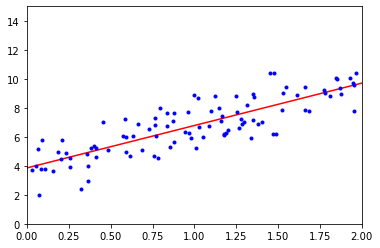

In [63]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

In [65]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [66]:
lin_reg.intercept_, lin_reg.coef_

(array([3.85507868]), array([[2.92496032]]))

In [67]:
lin_reg.predict(X_new)

array([[3.85507868],
       [9.70499932]])

In [68]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [69]:
theta_best_svd

array([[3.85507868],
       [2.92496032]])

In [70]:
np.linalg.pinv(X_b).dot(y)

array([[3.85507868],
       [2.92496032]])

# Batch Gradient Descent

In [72]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

In [73]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [74]:
theta

array([[3.85507868],
       [2.92496032]])

# Stochastic Gradient Descent

In [102]:
from sklearn.linear_model import SGDRegressor

In [100]:
n_epochs = 50
t0, t1 = 5, 50# learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [101]:
theta

array([[3.90657151],
       [2.91080306]])

In [103]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [104]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.84405524]), array([2.97030706]))

# Polynomial Regression

In [327]:
from sklearn.preprocessing import PolynomialFeatures

In [392]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + .50*np.random.randn(m, 1)

In [393]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [394]:
X[0]

array([2.26667752])

In [395]:
X_poly[0]

array([2.26667752, 5.13782696])

In [396]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [397]:
def pred_quad_plot(lin_reg, X, y):
    x_features = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg.fit(X_poly, y)
    thetas = np.c_[lin_reg.intercept_, lin_reg.coef_].T
    x_new = x_features.fit_transform(np.array([np.linspace(-3, 2.95, 120)]).T)
    x_new = np.c_[np.ones((120,1)), x_new] 
    y_new = x_poly.dot(thetas)
    plt.plot(x_new[:,1], y_new, "r-")
    plt.plot(X, y, "b.")
    plt.axis([-3, 2.95, -0, 11])

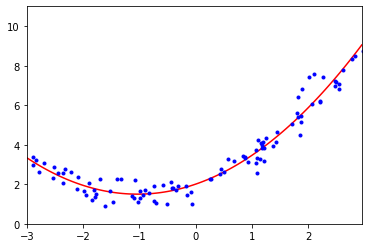

In [398]:
pred_quad_plot(lin_reg, X, y)

# Learning Curves

In [199]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [399]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))  
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

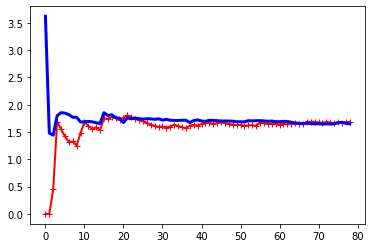

In [198]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [201]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),])

(0.0, 80.0, 0.0, 5.0)

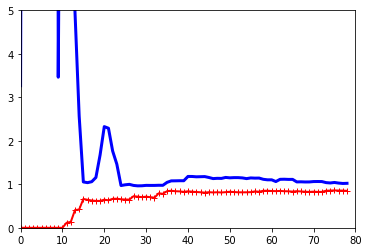

In [208]:
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 5])

# Ridge Regression

In [209]:
from sklearn.linear_model import Ridge

In [210]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [211]:
ridge_reg.predict([[1.5]])

array([[5.12077644]])

In [212]:
ridge_reg.intercept_, ridge_reg.coef_

(array([3.55320539]), array([[1.04504737]]))

In [227]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())

SGDRegressor()

In [228]:
sgd_reg.predict([[1.5]])

array([5.11285985])

# Lasso Regression

In [229]:
from sklearn.linear_model import Lasso

In [236]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [237]:
lasso_reg.predict([[1.5]])

array([4.68046877])

# Elastic Net

In [238]:
from sklearn.linear_model import ElasticNet

In [240]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

ElasticNet(alpha=0.1)

In [241]:
elastic_net.predict([[1.5]])

array([4.68505309])

# Early Stopping

In [247]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [249]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)

In [251]:
# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(
    max_iter=1,
    tol=-np.infty,
    warm_start=True,
    penalty=None,
    learning_rate="constant",
    eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/home/sejin8642/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/sejin8642/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/sejin8642/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/sejin8642/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

# Decision Boundaries

In [405]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [401]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [402]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

In [406]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

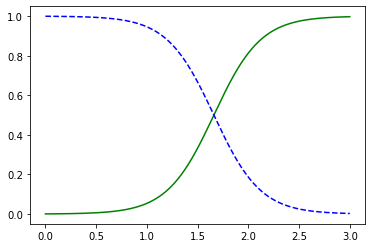

In [407]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [415]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

# Softmax Regression

In [416]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

In [417]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [418]:
softmax_reg.predict([[5, 2]])

array([2])

In [419]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])